In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_excel('Volve production data.xlsx')

In [2]:
columns_to_fill = [
    'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
    'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
    'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
for column in columns_to_fill:
    df[column] = df[column].ffill()

In [4]:
to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]
model = df.drop(to_drop, axis=1)
print(model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE        15634 non-null  int64         
 2   ON_STREAM_HRS             15634 non-null  float64       
 3   AVG_DOWNHOLE_PRESSURE     15634 non-null  float64       
 4   AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64       
 5   AVG_DP_TUBING             15634 non-null  float64       
 6   AVG_ANNULUS_PRESS         15634 non-null  float64       
 7   AVG_CHOKE_SIZE_P          15634 non-null  float64       
 8   AVG_WHP_P                 15634 non-null  float64       
 9   AVG_WHT_P                 15634 non-null  float64       
 10  DP_CHOKE_SIZE             15634 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
None


In [5]:
# Define los índices del pozo

first_index = 746
last_index = 1910

# Selecciona los datos del pozo

df_well = model.loc[first_index:last_index]
X = df_well.drop(['AVG_DOWNHOLE_PRESSURE'], axis=1)
y = df_well[['AVG_DOWNHOLE_PRESSURE', 'NPD_WELL_BORE_CODE']]

In [6]:
from sklearn.model_selection import train_test_split

# Assuming you have your data in X and y
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split training-validation set into training and validation
validation_split = 0.2  # Adjust this split as needed (e.g., 0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                test_size=validation_split, random_state=42)

In [7]:
# Print the number of data points in each split
print("Training data (X_train, y_train):", X_train.shape[0], y_train.shape[0])
print("Validation data (X_val, y_val):", X_val.shape[0], y_val.shape[0])
print("Test data (X_test, y_test):", X_test.shape[0], y_test.shape[0])

Training data (X_train, y_train): 652 652
Validation data (X_val, y_val): 163 163
Test data (X_test, y_test): 350 350


In [8]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_val_final=X_val.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)


In [9]:
y_val_final=y_val['AVG_DOWNHOLE_PRESSURE']
y_train_final = y_train['AVG_DOWNHOLE_PRESSURE']
y_test_final = y_test['AVG_DOWNHOLE_PRESSURE']

In [10]:
import sklearn.linear_model as lm
regresion = lm.LinearRegression()
regresion.fit(x_train_final, y_train_final)

LinearRegression()

In [11]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have x_train_final, y_train_final, etc. split

# Train data predictions
y_pred_train = regresion.predict(x_train_final)

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train_final, y_pred_train)
mse_train = mean_squared_error(y_train_final, y_pred_train)
r2_train = r2_score(y_train_final, y_pred_train)
rmse_train = np.sqrt(mse_train)  # Calculate RMSE from MSE

# Validation data predictions (already done in your code)
y_pred_val = regresion.predict(x_val_final)

# Calculate metrics for validation data
mae_val = mean_absolute_error(y_val_final, y_pred_val)
mse_val = mean_squared_error(y_val_final, y_pred_val)
r2_val = r2_score(y_val_final, y_pred_val)
rmse_val = np.sqrt(mse_val)  # Calculate RMSE from MSE

# Test data predictions (already done in your code)
y_pred_test = regresion.predict(x_test_final)

# Calculate metrics for test data
mae_test = mean_absolute_error(y_test_final, y_pred_test)
mse_test = mean_squared_error(y_test_final, y_pred_test)
r2_test = r2_score(y_test_final, y_pred_test)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE from MSE

# Print the results
print("Training Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("R2:", r2_train)
print("RMSE:", rmse_train)

print("\nValidation Metrics:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("R2:", r2_val)
print("RMSE:", rmse_val)

print("\nTest Metrics:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("R2:", r2_test)
print("RMSE:", rmse_test)


Training Metrics:
MAE: 0.5478565369360181
MSE: 3.5344971329695887
R2: 0.9973631101201071
RMSE: 1.8800258330591069

Validation Metrics:
MAE: 0.5631375132006107
MSE: 0.8009139478248262
R2: 0.9995588656542012
RMSE: 0.8949379575282446

Test Metrics:
MAE: 0.5113756760199389
MSE: 0.5568944060565026
R2: 0.9995758278790086
RMSE: 0.7462535802637751


In [12]:
# Create a dictionary with the metrics
data = {
    'Metric': ['MAE', 'MSE', 'R2','RMSE'],
    'Training': [mae_train, mse_train, r2_train,rmse_train],
    'Validation': [mae_val, mse_val, r2_val,rmse_val],
    'Test': [mae_test, mse_test, r2_test,rmse_test],

}

# Create the DataFrame from the dictionary
df = pd.DataFrame(data)
df

,Metric,Training,Validation,Test
0,MAE,0.547857,0.563138,0.511376
1,MSE,3.534497,0.800914,0.556894
2,R2,0.997363,0.999559,0.999576
3,RMSE,1.880026,0.894938,0.746254


<Axes: xlabel='Metric'>

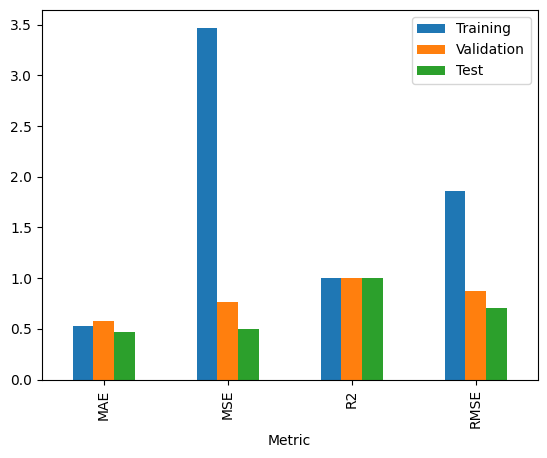

In [ ]:
# @title Average Metric Values by Set

df.groupby('Metric')[['Training', 'Validation', 'Test']].mean().plot(kind='bar')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
test_dates = X_test['DATEPRD']
train_dates=X_train['DATEPRD']
val_dates= X_val['DATEPRD']

In [14]:
# Create a DataFrame for training data
train_df = pd.DataFrame({'DATEPRD':train_dates,'Actual': y_train_final, 'Predicción': y_pred_train})

# Create a DataFrame for validation data
val_df = pd.DataFrame({'DATEPRD':val_dates,'Actual': y_val_final, 'Predicción': y_pred_val})

# Create a DataFrame for test data
test_df = pd.DataFrame({'DATEPRD':test_dates, 'Actual': y_test_final, 'Predicción': y_pred_test})

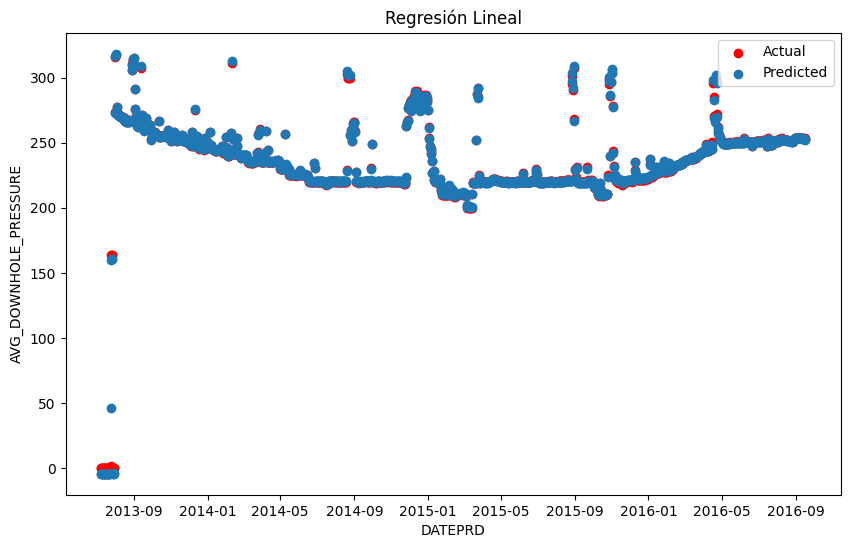

In [15]:
# Combine DataFrames (assuming they have the same columns)
combined_df = pd.concat([train_df, val_df, test_df])

# Plot the combined DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['DATEPRD'], combined_df['Actual'], label='Actual', color='red')
plt.scatter(combined_df['DATEPRD'], combined_df['Predicción'], label='Predicted')
plt.title('Regresión Lineal')
plt.xlabel('DATEPRD')
plt.ylabel('AVG_DOWNHOLE_PRESSURE')
plt.legend()
plt.show()

**Regresion Rigde**

In [16]:
from sklearn.linear_model import Ridge
# Crea y ajusta un modelo de regresión Ridge
modelo_ridge = Ridge(alpha=1.0)  # Ajusta alpha según sea necesario
modelo_ridge.fit(x_train_final, y_train_final)

Ridge()

In [17]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have x_train_final, y_train_final, etc. split

# Train data predictions
y_pred_train1 = modelo_ridge.predict(x_train_final)

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train_final, y_pred_train1)
mse_train = mean_squared_error(y_train_final, y_pred_train1)
r2_train = r2_score(y_train_final, y_pred_train1)
rmse_train = np.sqrt(mse_train)  # Calculate RMSE from MSE

# Validation data predictions (already done in your code)
y_pred_val1 = modelo_ridge.predict(x_val_final)

# Calculate metrics for validation data
mae_val = mean_absolute_error(y_val_final, y_pred_val1)
mse_val = mean_squared_error(y_val_final, y_pred_val1)
r2_val = r2_score(y_val_final, y_pred_val1)
rmse_val = np.sqrt(mse_val)  # Calculate RMSE from MSE

# Test data predictions (already done in your code)
y_pred_test1 = modelo_ridge.predict(x_test_final)

# Calculate metrics for test data
mae_test = mean_absolute_error(y_test_final, y_pred_test1)
mse_test = mean_squared_error(y_test_final, y_pred_test1)
r2_test = r2_score(y_test_final, y_pred_test1)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE from MSE

# Print the results
print("Training Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("R2:", r2_train)
print("RMSE:", rmse_train)

print("\nValidation Metrics:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("R2:", r2_val)
print("RMSE:", rmse_val)

print("\nTest Metrics:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("R2:", r2_test)
print("RMSE:", rmse_test)


Training Metrics:
MAE: 0.5480518348764123
MSE: 3.5344974945166214
R2: 0.9973631098503772
RMSE: 1.8800259292139088

Validation Metrics:
MAE: 0.5634030895185407
MSE: 0.8013834985163274
R2: 0.99955860703099
RMSE: 0.8952002560971078

Test Metrics:
MAE: 0.5115807205740269
MSE: 0.5572559607701068
R2: 0.9995755524920985
RMSE: 0.7464957875099543


,Metric,Training,Validation,Test
0,MAE,0.588474,0.610329,0.542206
1,MSE,3.418877,0.848515,0.609664
2,R2,0.997449,0.999533,0.999536
3,RMSE,1.849021,0.921149,0.780810


In [18]:
# Create a dictionary with the metrics
data1 = {
    'Metric': ['MAE', 'MSE', 'R2', 'RMSE'],
    'Training': [mae_train, mse_train, r2_train, rmse_train],
    'Validation': [mae_val, mse_val, r2_val, rmse_val],
    'Test': [mae_test, mse_test, r2_test, rmse_test],
}

# Create the DataFrame from the dictionary
df1 = pd.DataFrame(data)
df1




,Metric,Training,Validation,Test
0,MAE,0.547857,0.563138,0.511376
1,MSE,3.534497,0.800914,0.556894
2,R2,0.997363,0.999559,0.999576
3,RMSE,1.880026,0.894938,0.746254


In [19]:
# Create a DataFrame for training data
train_df = pd.DataFrame({'DATEPRD':train_dates,'Actual': y_train_final, 'Predicción': y_pred_train1})

# Create a DataFrame for validation data
val_df = pd.DataFrame({'DATEPRD':val_dates,'Actual': y_val_final, 'Predicción': y_pred_val1})

# Create a DataFrame for test data
test_df = pd.DataFrame({'DATEPRD':test_dates, 'Actual': y_test_final, 'Predicción': y_pred_test1})

**Regresion Lasso**

In [20]:
from sklearn.linear_model import Lasso
# Crea y ajusta un modelo de regresión Lasso
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario
modelo_lasso.fit(x_train_final, y_train_final)

Lasso()

In [21]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have x_train_final, y_train_final, etc. split

# Train data predictions
y_pred_train2 = modelo_lasso.predict(x_train_final)

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train_final, y_pred_train2)
mse_train = mean_squared_error(y_train_final, y_pred_train2)
r2_train = r2_score(y_train_final, y_pred_train2)
rmse_train = np.sqrt(mse_train)  # Calculate RMSE from MSE

# Validation data predictions (already done in your code)
y_pred_val2 = modelo_lasso.predict(x_val_final)

# Calculate metrics for validation data
mae_val = mean_absolute_error(y_val_final, y_pred_val2)
mse_val = mean_squared_error(y_val_final, y_pred_val2)
r2_val = r2_score(y_val_final, y_pred_val2)
rmse_val = np.sqrt(mse_val)  # Calculate RMSE from MSE

# Test data predictions (already done in your code)
y_pred_test2 = modelo_lasso.predict(x_test_final)

# Calculate metrics for test data
mae_test = mean_absolute_error(y_test_final, y_pred_test2)
mse_test = mean_squared_error(y_test_final, y_pred_test2)
r2_test = r2_score(y_test_final, y_pred_test2)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE from MSE

# Print the results
print("Training Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("R2:", r2_train)
print("RMSE:", rmse_train)

print("\nValidation Metrics:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("R2:", r2_val)
print("RMSE:", rmse_val)

print("\nTest Metrics:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("R2:", r2_test)
print("RMSE:", rmse_test)




Training Metrics:
MAE: 0.33498731983372676
MSE: 3.6675926750848404
R2: 0.9972638150082824
RMSE: 1.9150959963105871

Validation Metrics:
MAE: 0.3350746620566647
MSE: 0.5077131495057596
R2: 0.999720357338427
RMSE: 0.7125399283589374

Test Metrics:
MAE: 0.27328690951482243
MSE: 0.3000469367700903
R2: 0.9997714619788193
RMSE: 0.5477654030422973


In [22]:
# Create a dictionary with the metrics
data = {
    'Metric': ['MAE', 'MSE', 'R2','RMSE'],
    'Training': [mae_train, mse_train, r2_train,rmse_train],
    'Validation': [mae_val, mse_val, r2_val,rmse_val],
    'Test': [mae_test, mse_test, r2_test,rmse_test],

}

# Create the DataFrame from the dictionary
df = pd.DataFrame(data)
df

,Metric,Training,Validation,Test
0,MAE,0.334987,0.335075,0.273287
1,MSE,3.667593,0.507713,0.300047
2,R2,0.997264,0.999720,0.999771
3,RMSE,1.915096,0.712540,0.547765


**Regresion Elastinet**

In [23]:
from sklearn.linear_model import ElasticNet
# Crea y ajusta un modelo de regresión Elastic Net
modelo_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Ajusta alpha y l1_ratio según sea necesario
modelo_elasticnet.fit(x_train_final, y_train_final)

ElasticNet()

In [24]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have x_train_final, y_train_final, etc. split

# Train data predictions
y_pred_train3 = modelo_elasticnet.predict(x_train_final)

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train_final, y_pred_train3)
mse_train = mean_squared_error(y_train_final, y_pred_train3)
r2_train = r2_score(y_train_final, y_pred_train3)
rmse_train = np.sqrt(mse_train)  # Calculate RMSE from MSE

# Validation data predictions (already done in your code)
y_pred_val3 = modelo_elasticnet.predict(x_val_final)

# Calculate metrics for validation data
mae_val = mean_absolute_error(y_val_final, y_pred_val3)
mse_val = mean_squared_error(y_val_final, y_pred_val3)
r2_val = r2_score(y_val_final, y_pred_val3)
rmse_val = np.sqrt(mse_val)  # Calculate RMSE from MSE

# Test data predictions (already done in your code)
y_pred_test3 = modelo_elasticnet.predict(x_test_final)

# Calculate metrics for test data
mae_test = mean_absolute_error(y_test_final, y_pred_test3)
mse_test = mean_squared_error(y_test_final, y_pred_test3)
r2_test = r2_score(y_test_final, y_pred_test3)
rmse_test = np.sqrt(mse_test)  # Calculate RMSE from MSE

# Print the results
print("Training Metrics:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("R2:", r2_train)
print("RMSE:", rmse_train)

print("\nValidation Metrics:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("R2:", r2_val)
print("RMSE:", rmse_val)

print("\nTest Metrics:")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("R2:", r2_test)
print("RMSE:", rmse_test)


Training Metrics:
MAE: 0.4913536533694416
MSE: 3.580545177823108
R2: 0.9973287562590358
RMSE: 1.8922328550744245

Validation Metrics:
MAE: 0.521027070780061
MSE: 0.771296847124973
R2: 0.9995751784183592
RMSE: 0.8782350750937775

Test Metrics:
MAE: 0.4444861932350762
MSE: 0.504380041353049
R2: 0.9996158267175973
RMSE: 0.7101971848388651


In [25]:
# Create a dictionary with the metrics
data = {
    'Metric': ['MAE', 'MSE', 'R2','RMSE'],
    'Training': [mae_train, mse_train, r2_train,rmse_train],
    'Validation': [mae_val, mse_val, r2_val,rmse_val],
    'Test': [mae_test, mse_test, r2_test,rmse_test],

}

# Create the DataFrame from the dictionary
df = pd.DataFrame(data)
df

,Metric,Training,Validation,Test
0,MAE,0.491354,0.521027,0.444486
1,MSE,3.580545,0.771297,0.504380
2,R2,0.997329,0.999575,0.999616
3,RMSE,1.892233,0.878235,0.710197
